In [1]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Global variables

# Path to images dir
PICTURES_DIR = Path("./Sample_Pictures/Al")

# Grid size
GRID_ROWS = 5
GRID_COLS = 5

# If True, write the coverage percent to the image
WRITE_PERCENT = True

In [3]:
# Read image paths
imgs_paths: list[Path] = []
for file in Path(PICTURES_DIR).iterdir():
    if file.is_file() and file.suffix.lower() in {".jpg", ".png", ".jpeg"}:
        imgs_paths.append(file)

Loaded image: Sample_Pictures\Al\Al_10b_0.jpg


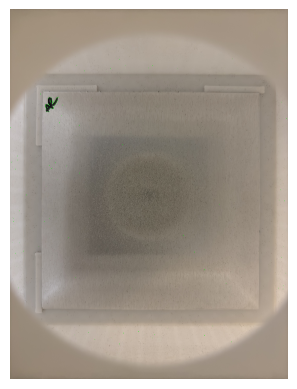

Loaded image: Sample_Pictures\Al\Al_10d_0.jpg


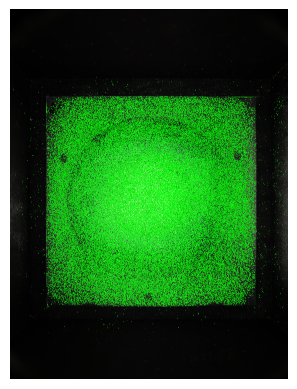

Loaded image: Sample_Pictures\Al\Al_10d_1.jpg


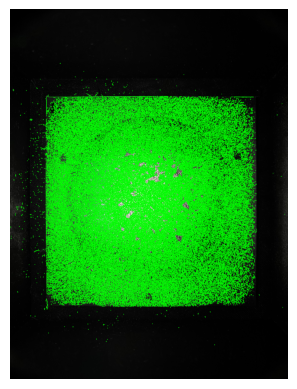

Loaded image: Sample_Pictures\Al\Al_10d_2.jpg


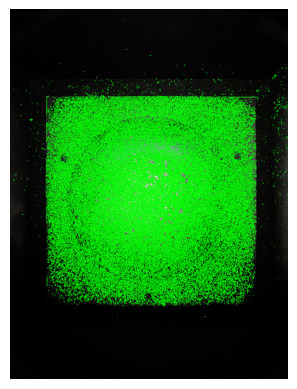

Loaded image: Sample_Pictures\Al\Al_10d_3.jpg


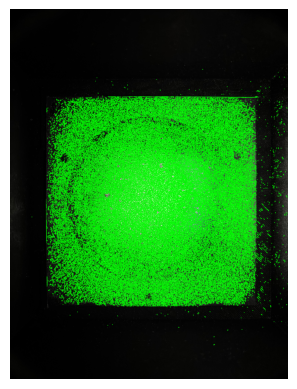

Loaded image: Sample_Pictures\Al\Al_10d_4.jpg


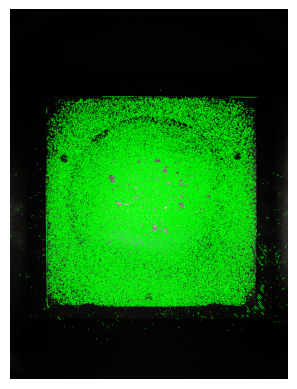

Loaded image: Sample_Pictures\Al\Al_11b_0.jpg


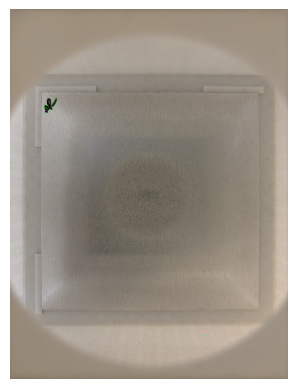

Loaded image: Sample_Pictures\Al\Al_11d_0.jpg


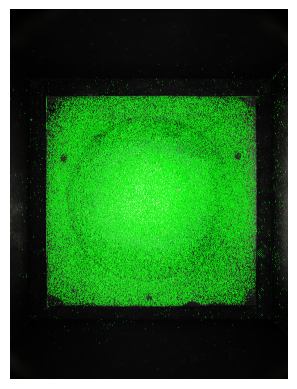

Loaded image: Sample_Pictures\Al\Al_11d_1.jpg


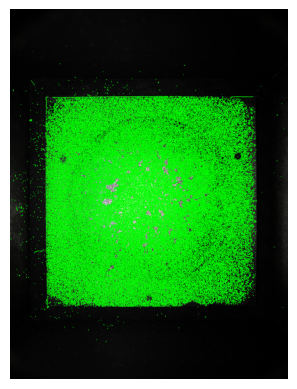

Loaded image: Sample_Pictures\Al\Al_11d_2.jpg


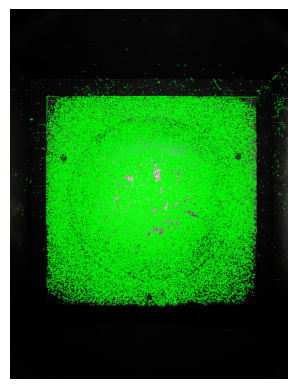

Loaded image: Sample_Pictures\Al\Al_11d_3.jpg


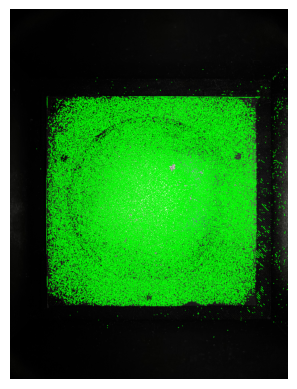

Loaded image: Sample_Pictures\Al\Al_11d_4.jpg


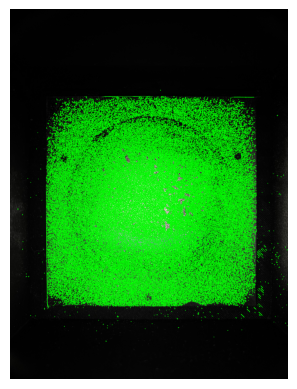

Loaded image: Sample_Pictures\Al\Al_12b_0.jpg


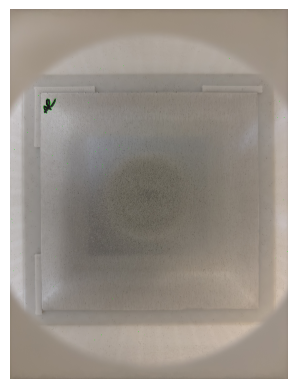

Loaded image: Sample_Pictures\Al\Al_12d_0.jpg


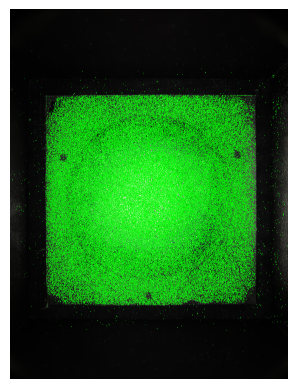

Loaded image: Sample_Pictures\Al\Al_12d_1.jpg


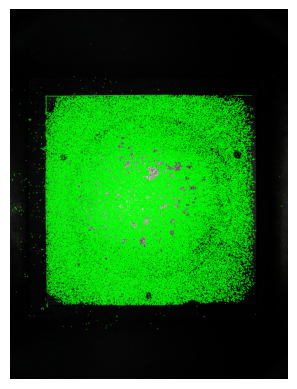

Loaded image: Sample_Pictures\Al\Al_12d_2.jpg


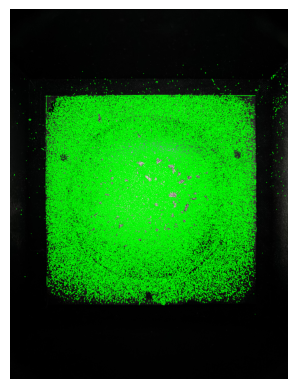

Loaded image: Sample_Pictures\Al\Al_12d_3.jpg


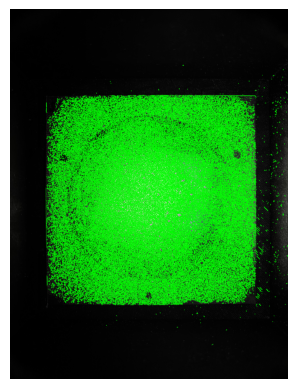

Loaded image: Sample_Pictures\Al\Al_12d_4.jpg


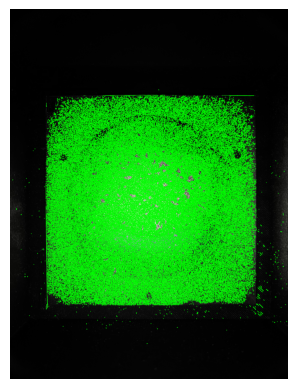

Loaded image: Sample_Pictures\Al\Al_13b_0.jpg


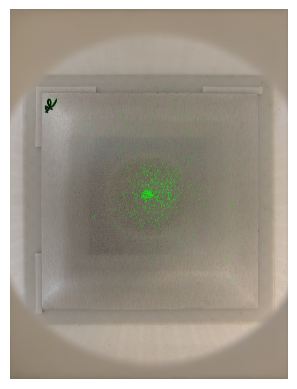

Loaded image: Sample_Pictures\Al\Al_13d_0.jpg


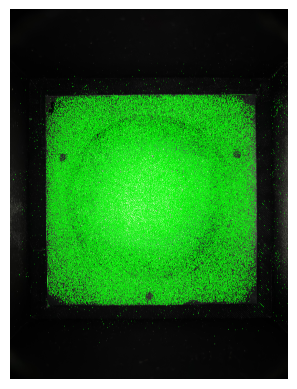

Loaded image: Sample_Pictures\Al\Al_13d_1.jpg


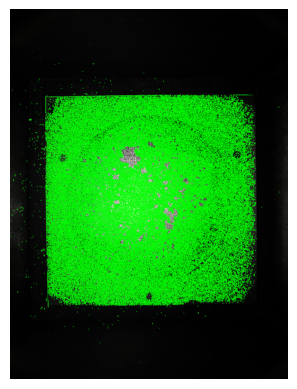

Loaded image: Sample_Pictures\Al\Al_13d_2.jpg


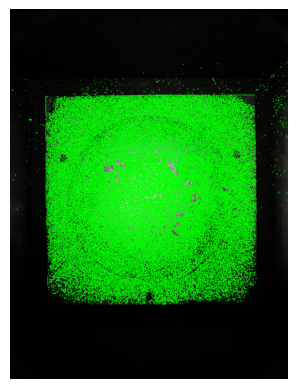

Loaded image: Sample_Pictures\Al\Al_13d_3.jpg


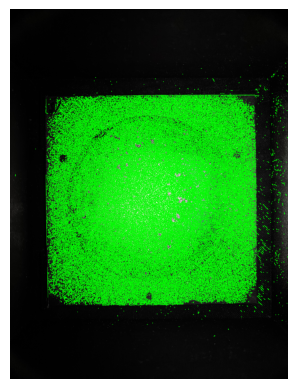

Loaded image: Sample_Pictures\Al\Al_13d_4.jpg


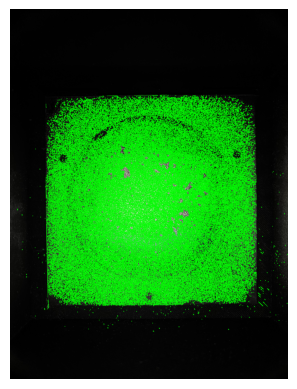

Loaded image: Sample_Pictures\Al\Al_14b_0.jpg


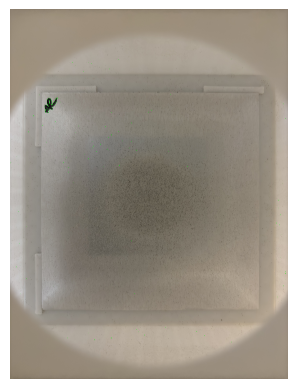

Loaded image: Sample_Pictures\Al\Al_14d_0.jpg


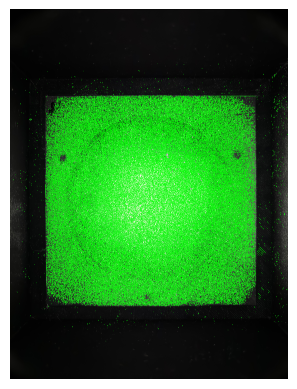

Loaded image: Sample_Pictures\Al\Al_14d_1.jpg


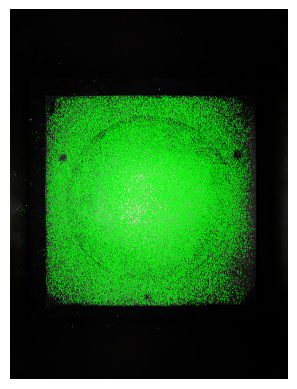

Loaded image: Sample_Pictures\Al\Al_14d_2.jpg


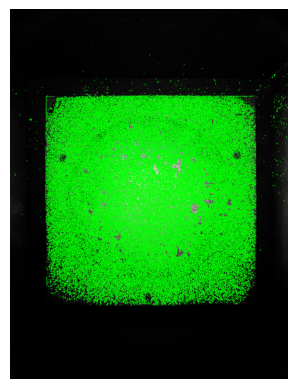

Loaded image: Sample_Pictures\Al\Al_14d_3.jpg


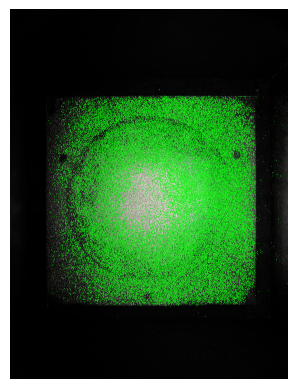

Loaded image: Sample_Pictures\Al\Al_14d_4.jpg


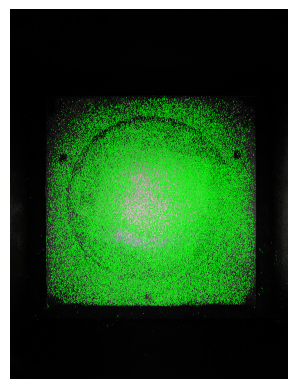

Loaded image: Sample_Pictures\Al\Al_15b_0.jpg


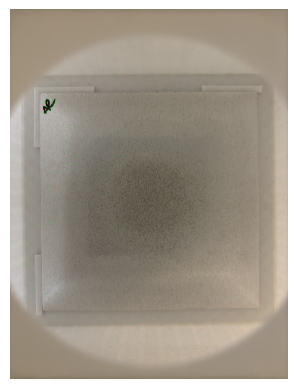

Loaded image: Sample_Pictures\Al\Al_15d_0.jpg


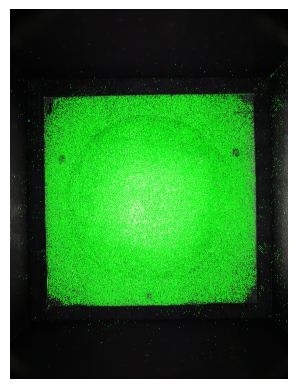

Loaded image: Sample_Pictures\Al\Al_15d_1.jpg


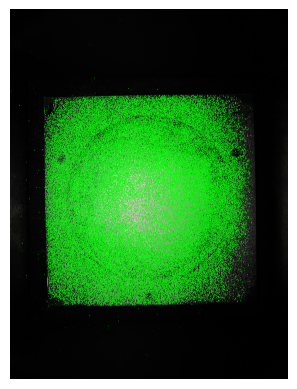

Loaded image: Sample_Pictures\Al\Al_15d_2.jpg


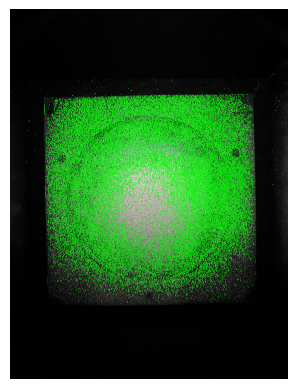

Loaded image: Sample_Pictures\Al\Al_15d_3.jpg


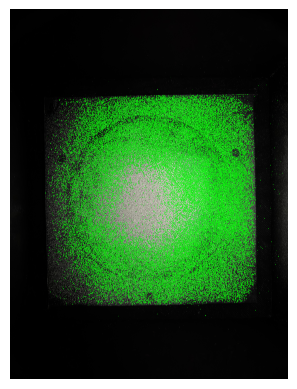

Loaded image: Sample_Pictures\Al\Al_15d_4.jpg


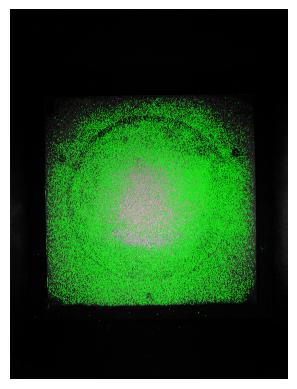

Loaded image: Sample_Pictures\Al\Al_16b_0.jpg


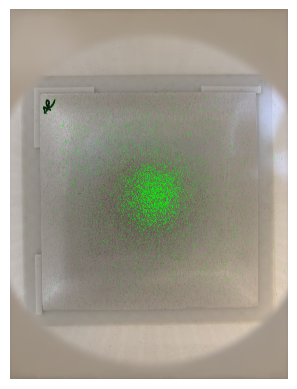

Loaded image: Sample_Pictures\Al\Al_16d_0.jpg


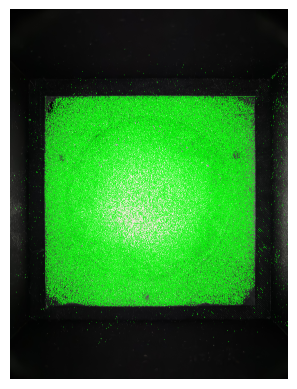

Loaded image: Sample_Pictures\Al\Al_16d_1.jpg


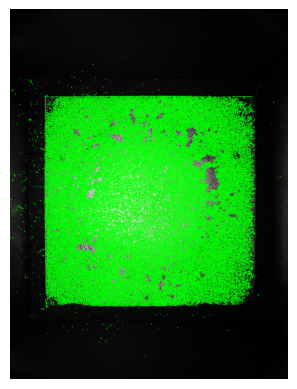

Loaded image: Sample_Pictures\Al\Al_16d_2.jpg


In [ ]:
def analyze_image(path: Path) -> dict[tuple[int, int], float]:
    """
    Takes a path to an image and returns a dictionary with the estimated coverage percent of each cell in the grid.
    """

    img = cv2.imread(str(path), cv2.IMREAD_COLOR)
    if img is None:
        print("Failed to load image:", path)
        return
    print("Loaded image:", path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

    # # Convert to grayscale
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # # Split the image into a grid
    # height, width, _ = img.shape
    # cell_height = height // GRID_ROWS
    # cell_width = width // GRID_COLS

    # result = {}
    # for i, j in product(range(GRID_ROWS), range(GRID_COLS)):
    #     cell = img[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width]
    #     cell_mean = np.mean(cell)

    #     # Apply thresholding against mean value
    #     _, cell = cv2.threshold(cell, cell_mean, 255, cv2.THRESH_BINARY)

    #     # Calculate coverage percent
    #     coverage = np.count_nonzero(cell == 0) / cell.size
    #     if WRITE_PERCENT:
    #         cv2.putText(cell, f"{coverage:.2%}", (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 8, (0, 0, 255), 4, cv2.LINE_AA)

    #     print(f"Cell ({i}, {j}): {coverage:.2%}")
    #     plt.imshow(cv2.cvtColor(cell, cv2.COLOR_BGR2RGB))
    #     plt.axis("off")
    #     plt.show()

    #     # Insert cell back into the image
    #     img[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width] = cell

    #     result[(i, j)] = coverage

    # # Draw grid
    # for i in range(1, GRID_ROWS):
    #     cv2.line(img, (0, i * cell_height), (width, i * cell_height), (0, 0, 255), 2)
    # for i in range(1, GRID_COLS):
    #     cv2.line(img, (i * cell_width, 0), (i * cell_width, height), (0, 0, 255), 2)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    cv2.imwrite("output.png", img)
    return None
    # return result


# analyze_image(imgs_paths[0])
for path in imgs_paths:
    analyze_image(path)